In [6]:
import numpy as np
import operator
import os
import cv2
import re
import pylab as pl
from fnmatch import fnmatch
from IPython.core.display import Image
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

(180, 100)
[180 100]
[ 0 10]


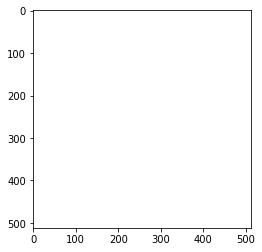

In [7]:
img = np.ones((512,512,3), np.uint8)
img=img*255
plt.imshow(img)
Points=dict()
Points['1']=(np.array([180,100]),(255,0,0),1)    #Location,Color,Weight
Points['2']=(np.array([100,200]),(255,0,0),1)
Points['3']=(np.array([300,150]),(255,0,0),1)
Points['4']=(np.array([350,50]),(0,0,255),1)
Points['5']=(np.array([400,200]),(0,0,255),1)
Points['6']=(np.array([280,300]),(0,0,250),1)
Points['7']=(np.array([200,400]),(255,0,0),1)
Points['8']=(np.array([300,420]),(0,0,255),1)
Points['9']=(np.array([370,320]),(0,0,255),1)


A1=np.array([0,10])
A2=np.array([500,350])

B1=np.array([240,1])
B2=np.array([240,500])

C1=np.array([10,250])
C2=np.array([500,250])

D1=np.array([10,300])
D2=np.array([500,125])

thresh=np.array([10,10])

Lines=dict()
Lines['A']=(A1,A2)
#Lines['B']=(B1,B2)
Lines['C']=(C1,C2)
Lines['D']=(D1,D2)

print(tuple(Points['1'][0]))
print(Points['1'][0])
print(Lines['A'][0])  #Gives A1

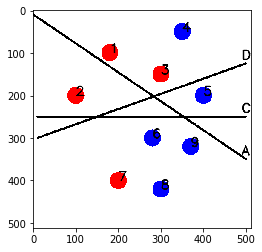

In [8]:

font = cv2.FONT_HERSHEY_SIMPLEX

for keys in Points:
    img = cv2.circle(img,tuple(Points[keys][0]), 20, Points[keys][1], -1)
    cv2.putText(img,keys,tuple(Points[keys][0]), font, 1,(0,0,0),2,cv2.LINE_AA)
    
    
for keys in Lines:
    img = cv2.line(img,tuple(Lines[keys][0]),tuple(Lines[keys][1]),(0,0,0),3)
    cv2.putText(img,keys,tuple(Lines[keys][1]-thresh), font, 1,(0,0,0),2,cv2.LINE_AA)


plt.imshow(img)

In [18]:
e=[0,0,0,0]
i=0
for akeys in Lines:
    
    print("BELOW LINE %s is BLUE\n" %akeys)
    for keys in Points:
        if np.cross(Points[keys][0]-Lines[akeys][0], Lines[akeys][1]-Lines[akeys][0]) < 0:
            print("Point %s lies Below line %s" %(keys,akeys))
            if Points[keys][1]==(255,0,0):  #is RED
                print("And since it is RED, This is Error")#Then Increase its weight
                print("\n")
                e[i]=e[i]+Points[keys][2]
        else:
            print("Point %s lies Above line %s" %(keys,akeys))
            if Points[keys][1]==(0,0,255):
                print("And since it is BLUE, This is Error")#Then Increase its weight
                print("\n")
                e[i]=e[i]+Points[keys][2]
    print("Total error for Classisfier %s is %d"%(akeys,e[i]))
    i+=1
    
                
                
print("Right of LINE B is BLUE\n")
for keys in Points:
    if np.cross(Points[keys][0]-B1, B2-B1) < 0:
        print("Point %s lies Left line B" %keys)
        if Points[keys][1]==(0,0,255):#is BLUE
            print("And since it is BLUE, This is Error")#Then Increase its weight
            print("\n")
            e[3]=e[3]+Points[keys][2]
    else:
        print("Point %s lies Right line B" %keys)
        if Points[keys][1]==(255,0,0):#is RED
            print("And since it is RED, This Error")#Then Increase its weight
            print("\n")
            e[3]=e[3]+Points[keys][2]
print("Total error for Classisfier B is ",e[3])


BELOW LINE A is BLUE

Point 4 lies Above line A
And since it is BLUE, This is Error


Point 3 lies Above line A
Point 2 lies Below line A
And since it is RED, This is Error


Point 6 lies Below line A
Point 8 lies Below line A
Point 1 lies Above line A
Point 9 lies Below line A
Point 5 lies Above line A
And since it is BLUE, This is Error


Point 7 lies Below line A
And since it is RED, This is Error


Total error for Classisfier A is 4
BELOW LINE C is BLUE

Point 4 lies Above line C
And since it is BLUE, This is Error


Point 3 lies Above line C
Point 2 lies Above line C
Point 6 lies Below line C
Point 8 lies Below line C
Point 1 lies Above line C
Point 9 lies Below line C
Point 5 lies Above line C
And since it is BLUE, This is Error


Point 7 lies Below line C
And since it is RED, This is Error


Total error for Classisfier C is 3
BELOW LINE D is BLUE

Point 4 lies Above line D
And since it is BLUE, This is Error


Point 3 lies Above line D
Point 2 lies Above line D
Point 6 lies Belo

In [22]:
min(e)
np.argmin(e)
#np.argmin(score)

3

In [33]:
Lines['B']=(B1,B2)
print(Lines
    )

{'A': (array([ 0, 10]), array([500, 350])), 'C': (array([ 10, 250]), array([500, 250])), 'D': (array([ 10, 300]), array([500, 125])), 'B': (array([240,   1]), array([240, 500]))}


In [34]:
del Lines['B']
print(Lines
    )

{'A': (array([ 0, 10]), array([500, 350])), 'C': (array([ 10, 250]), array([500, 250])), 'D': (array([ 10, 300]), array([500, 125]))}
